# Spatiotemporal Segregation Dynamics

In [1]:
%load_ext watermark
%watermark -v -a "author: eli knaap" -d -u -p segregation,libpysal,geopandas,geosnap

Author: author: eli knaap

Last updated: 2024-01-22

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.18.1

segregation: 2.5
libpysal   : 4.9.2
geopandas  : 0.14.2
geosnap    : 0.12.1.dev9+g3a1cb0f6de61.d20240110



Some plots in this notebook require `hvplot`, which is not a standard geosnap dependency

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import hvplot.pandas

from segregation import singlegroup, multigroup, dynamics, batch
from geosnap import DataStore
from geosnap import io as gio
from geosnap.analyze import segdyn

In [3]:
from geosnap.visualize import plot_timeseries

In [4]:
datasets = DataStore()

In [5]:
dc = gio.get_acs(datasets, msa_fips='47900', years=[2012, 2016,])
dc21 =  gio.get_acs(datasets, msa_fips='47900', years=[2021])
dc21=dc21.set_crs(dc.crs)
dc = gpd.GeoDataFrame(pd.concat([dc,dc21]))

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:188: UserWarning: `constant_dollars` is True, but no `currency_year` was specified. Resorting to max value of 2016
  warn(
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/util.py:275: UserWarning: Unable to find local adjustment year for 2021. Attempting from online data
  warn(
/Users/knaaptime/Dropbox/projects/geosnap/geosnap/io/constructors.py:215: UserWarning: Currency columns unavailable at this resolution; not adjusting for inflation
  warn(


In [6]:
dc = dc.to_crs(dc.estimate_utm_crs())

In [7]:
dc.head()

geoid  n_total_housing_units  n_vacant_housing_units  \
0  110010001001                  776.0                   120.0   
1  110010001002                  907.0                   110.0   
2  110010001003                  589.0                    39.0   
3  110010001004                  552.0                   102.0   
4  110010002011                    0.0                     0.0   

   n_occupied_housing_units  n_owner_occupied_housing_units  \
0                     656.0                           245.0   
1                     797.0                           369.0   
2                     550.0                           391.0   
3                     450.0                           256.0   
4                       0.0                             0.0   

   n_renter_occupied_housing_units  \
0                            411.0   
1                            428.0   
2                            159.0   
3                            194.0   
4                              0.0   

   n_housing_units_multiunit_structures_denom  \
0                                       776.0   
1                                       907.0   
2                                       589.0   
3                                       552.0   
4                                         0.0   

   n_housing_units_multiunit_structures  n_total_housing_units_sample  \
0                                 375.0                         776.0   
1                                 546.0                         907.0   
2                                 221.0                         589.0   
3                                 166.0                         552.0   
4                                   0.0                           0.0   

   median_home_value  ...  p_hispanic_persons  p_native_persons  \
0       1.014441e+06  ...           12.808642          0.000000   
1       7.830297e+05  ...            1.210287          0.000000   
2       1.047112e+06  ...            4.755245          5.664336   
3       1.047112e+06  ...            1.612903          0.000000   
4                NaN  ...            4.442808          0.000000   

   p_asian_persons  p_hawaiian_persons  p_asian_indian_persons  p_edu_hs_less  \
0         3.395062                 0.0                3.395062            0.0   
1         3.479576                 0.0                3.479576            0.0   
2         7.552448                 0.0                7.552448            0.0   
3         6.854839                 0.0                6.854839            0.0   
4        12.272950                 0.0               12.272950            0.0   

   p_edu_college_greater  p_veterans  \
0              87.141444    4.938272   
1              86.875612    5.975794   
2              97.289448    8.181818   
3              85.314685    4.334677   
4              49.382716    0.000000   

                                            geometry  year  
0  MULTIPOLYGON (((320658.461 4309603.540, 320718...  2012  
1  MULTIPOLYGON (((321636.641 4308861.303, 321646...  2012  
2  MULTIPOLYGON (((320967.686 4308858.767, 320969...  2012  
3  MULTIPOLYGON (((320608.256 4307826.451, 321099...  2012  
4  MULTIPOLYGON (((319785.287 4309141.585, 319879...  2012  

[5 rows x 58 columns]

In [8]:
from IPython.display import IFrame

## Racial Segregation over Time

In [9]:
groups = ['n_nonhisp_white_persons', 'n_nonhisp_black_persons', 'n_hispanic_persons', 'n_asian_persons']

/Users/knaaptime/Dropbox/projects/geosnap/geosnap/visualize/mapping.py:170: UserWarning: `proplot` is not installed.  Falling back to matplotlib
  warn("`proplot` is not installed.  Falling back to matplotlib")


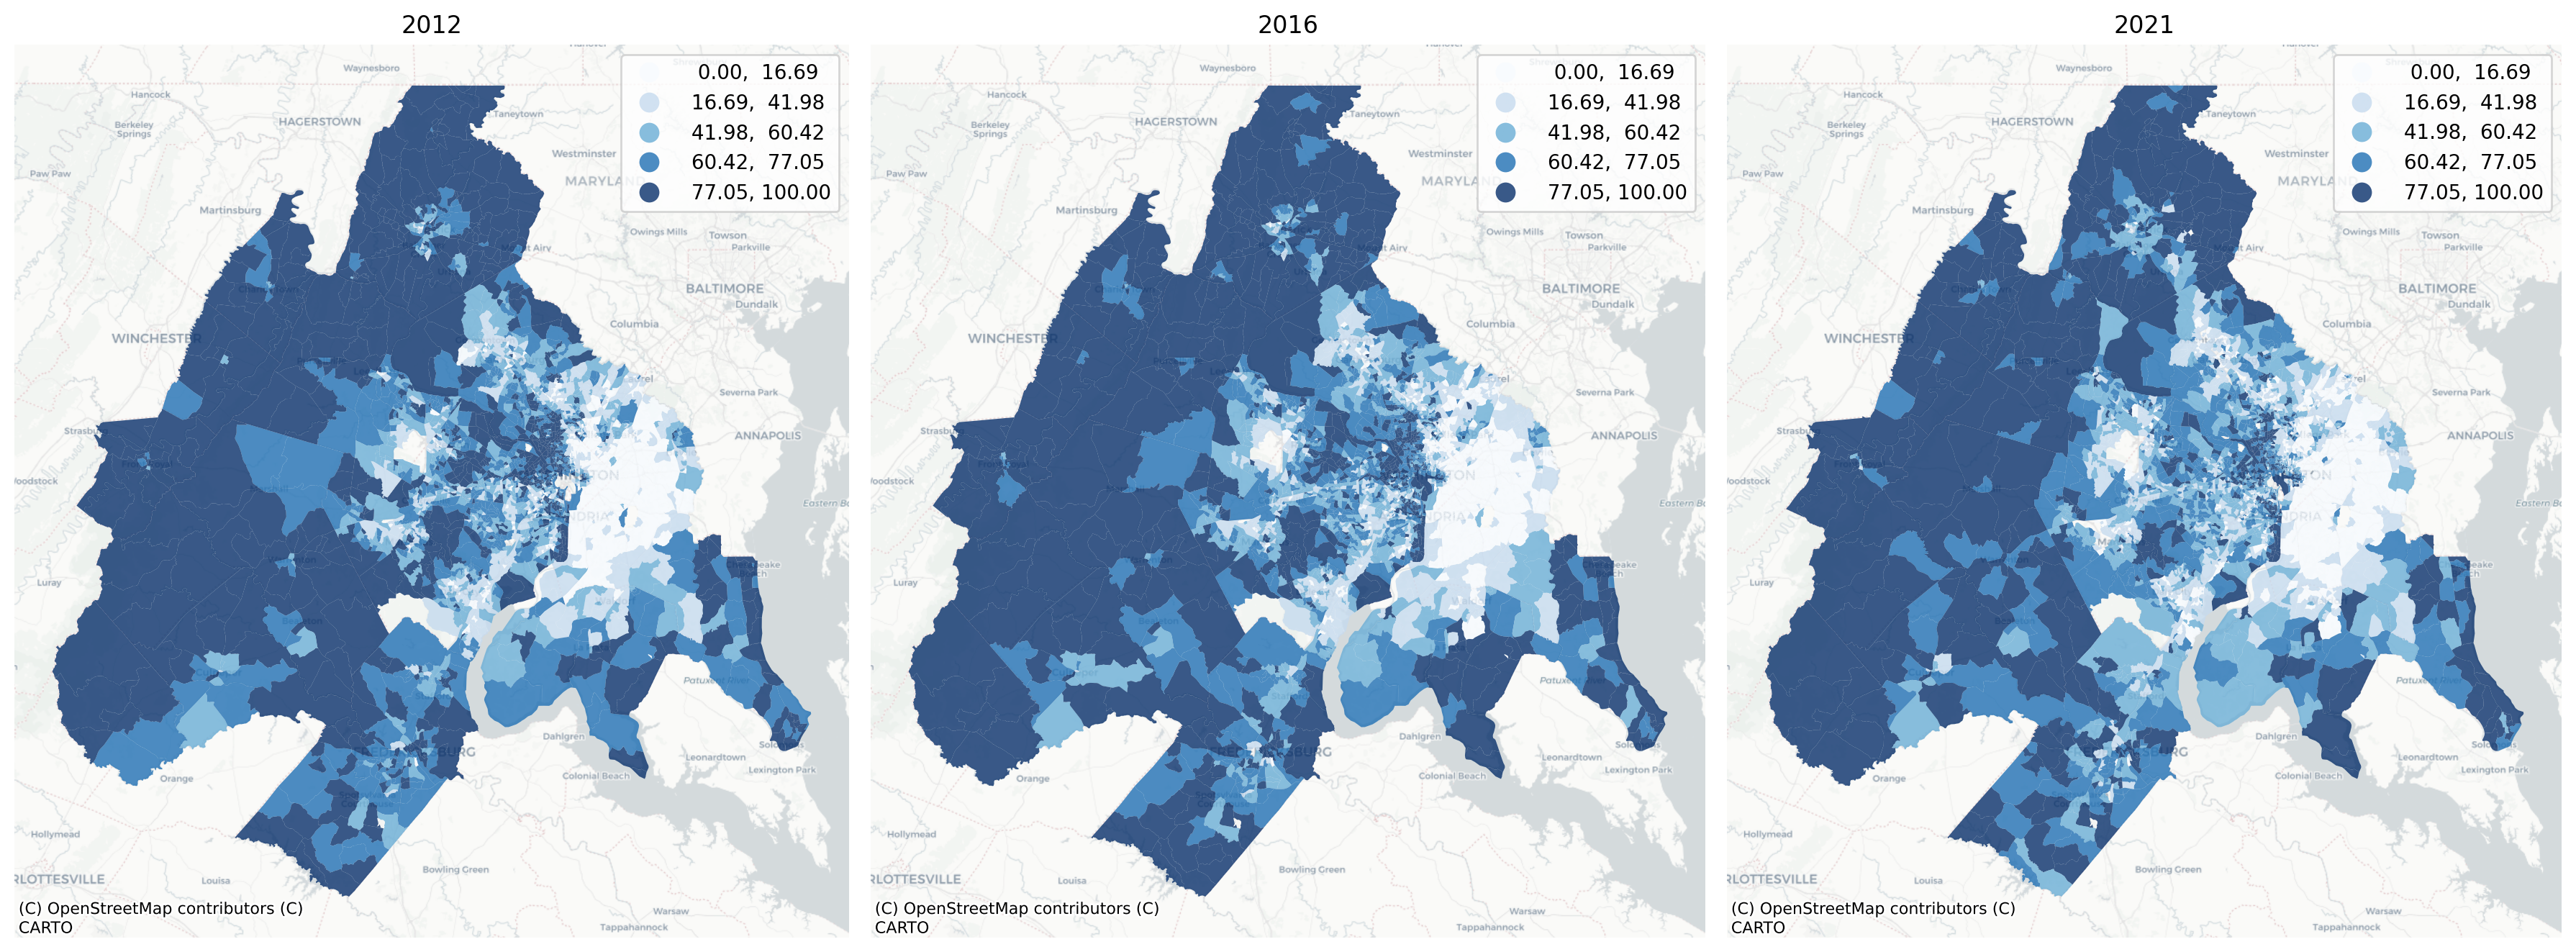

In [10]:
plot_timeseries(dc, 'p_nonhisp_white_persons', nrows=1, ncols=3, figsize=(18,10), cmap='Blues', alpha=0.8)
plt.tight_layout()

### Temporal Dynamics

#### Multi-Group Indices

In [11]:
multi_by_time = segdyn.multigroup_tempdyn(dc, groups)

In [12]:
multi_by_time

year                        2012      2016      2021
Name                                                
GlobalDistortion        191.2887  179.0859  195.9176
MultiDissim               0.5263    0.5138    0.5151
MultiDivergence           0.3845    0.3727    0.3900
MultiDiversity            1.1958    1.2200    1.2499
MultiGini                 0.6952    0.6788    0.6816
MultiInfoTheory           0.3215    0.3055    0.3120
MultiNormExposure         0.3315    0.3169    0.3150
MultiRelativeDiversity    0.3196    0.3061    0.3066
MultiSquaredCoefVar       0.2640    0.2579    0.2700
SimpsonsConcentration     0.3503    0.3375    0.3212
SimpsonsInteraction       0.6497    0.6625    0.6788

<Axes: xlabel='year'>

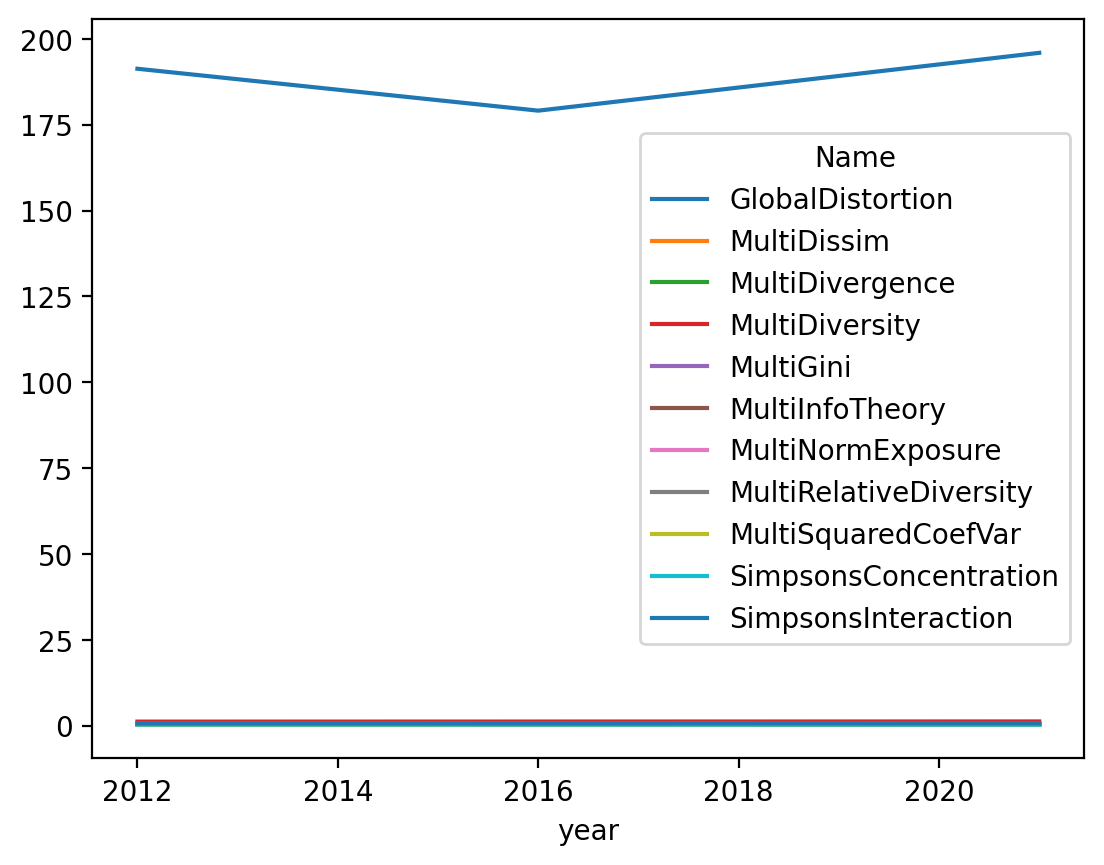

In [13]:
multi_by_time.T.plot()

<Axes: xlabel='year'>

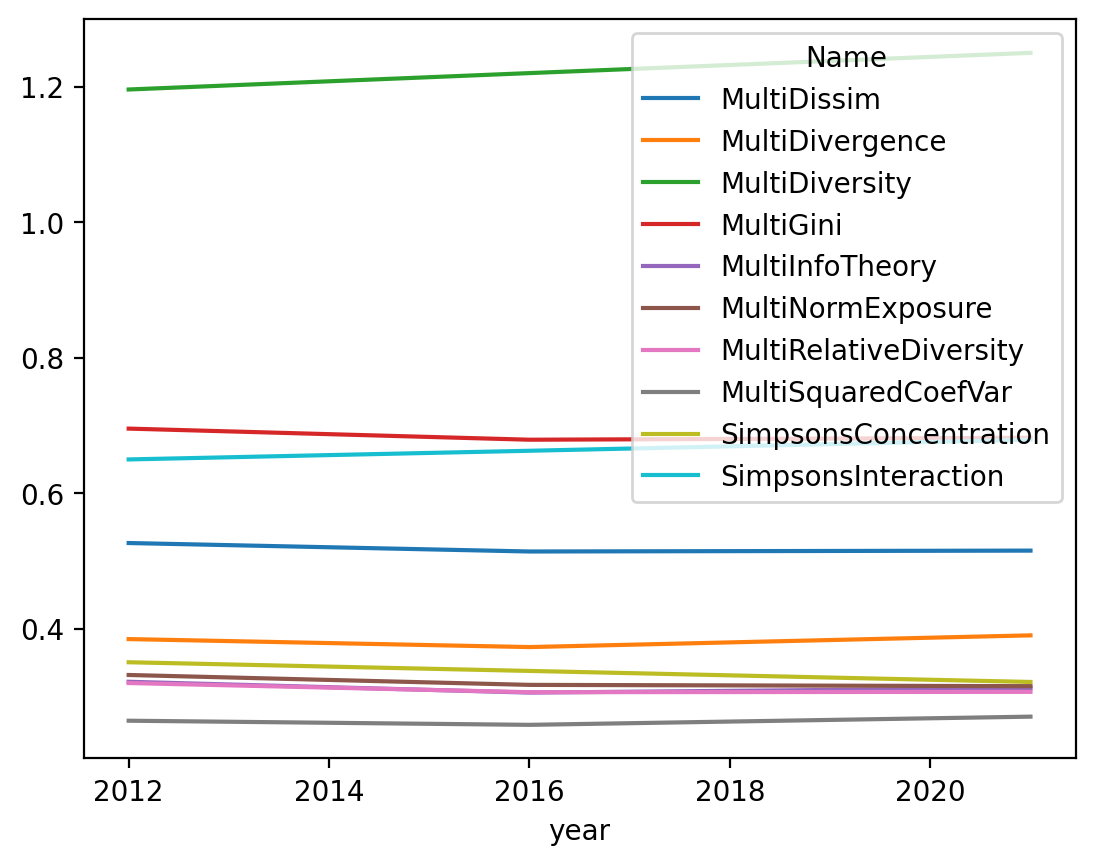

In [14]:
# removing the GlobalDistortion coef lets us see what's happening with the rest of the indices
multi_by_time.iloc[1:].T.plot()

Most indices are changing little over time, but most have followed the same trend with a mild drop in 2016 prior to a slight increase in the latest available data

Text(0.5, 0.98, 'Multigroup Dissimilarity')

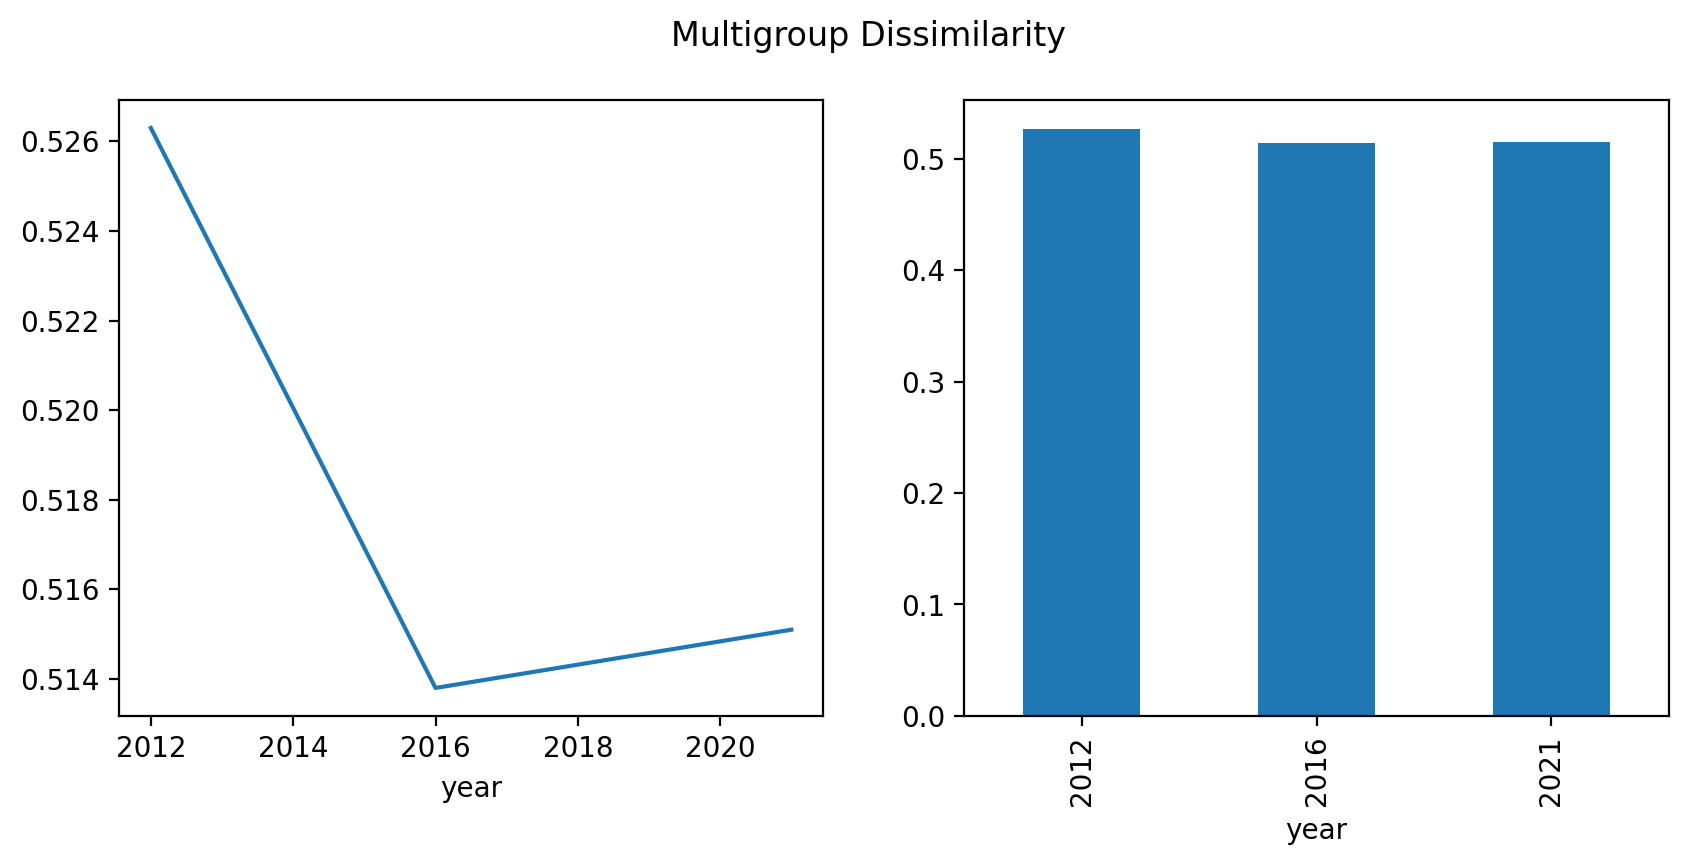

In [15]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

multi_by_time.loc['MultiDissim'].plot(ax=axs[0])
multi_by_time.loc['MultiDissim'].plot(kind='bar', ax=axs[1])

fig.suptitle("Multigroup Dissimilarity")

One that **isn't**, is SimpsonsConcentration, which is increasing over time. Another index that bucks the trend is SimpsonsInteraction, which is decreasing over time (corresponding with an increse in segregation). The divergence between indices tells us that segregation may be changing in different ways across its different dimensions.

Text(0.5, 0.98, "Simpson's Concentration")

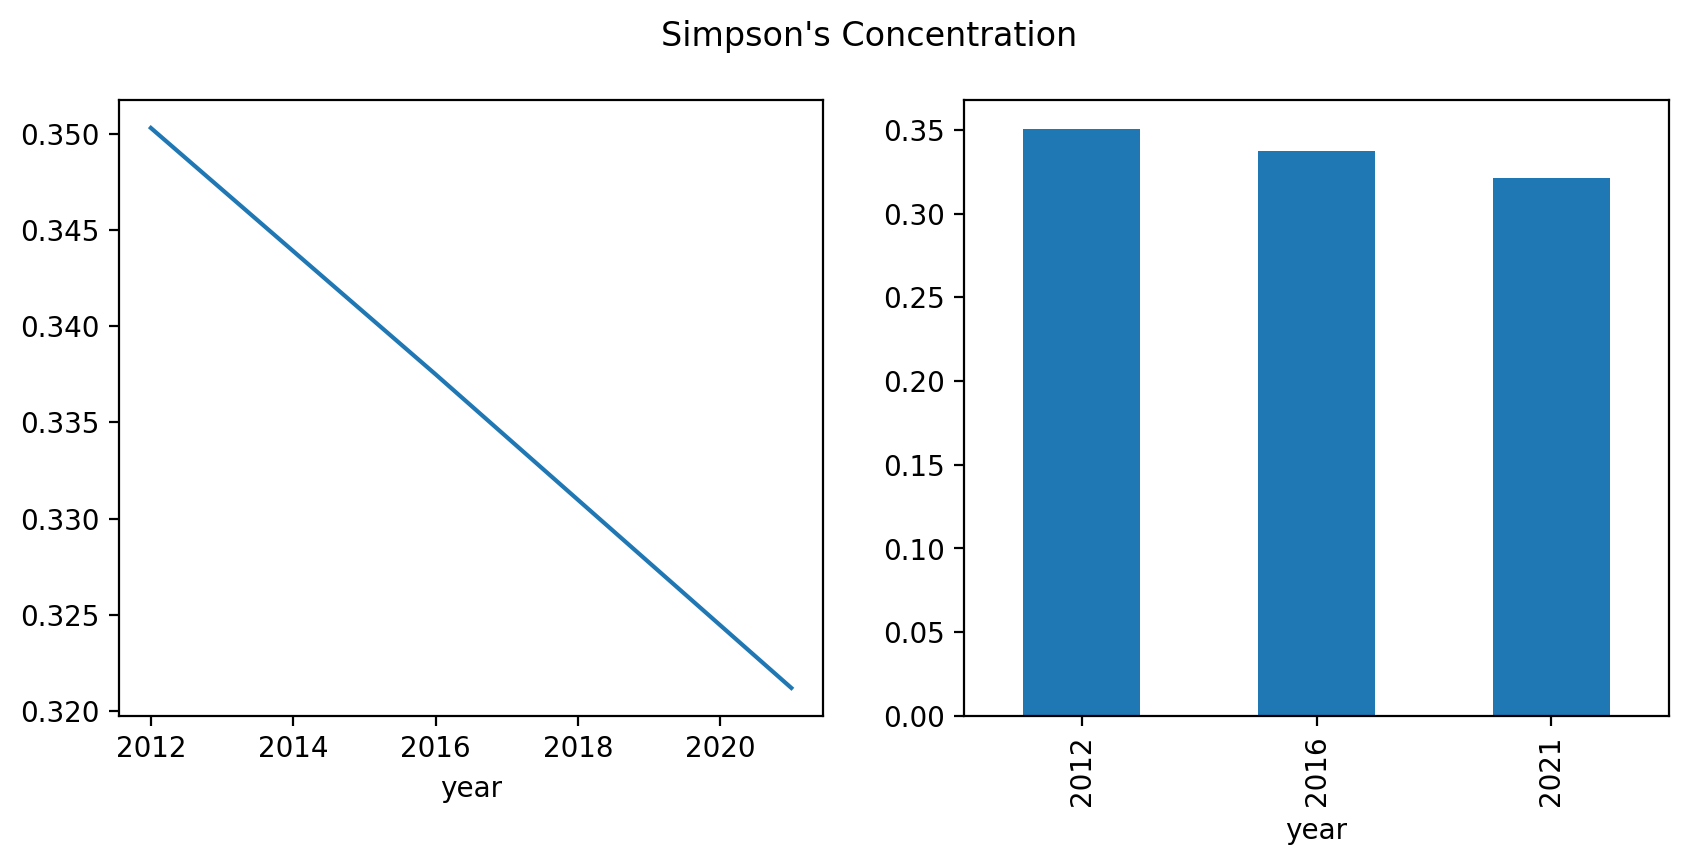

In [16]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

multi_by_time.loc['SimpsonsConcentration'].plot(ax=axs[0])
multi_by_time.loc['SimpsonsConcentration'].plot(kind='bar', ax=axs[1])

fig.suptitle("Simpson's Concentration")

#### Single-Group Indices

In [17]:
from geosnap.analyze.segdyn import singlegroup_tempdyn

In [18]:
singlegroup_tempdyn?

Signature:
singlegroup_tempdyn(
    gdf,
    group_pop_var=None,
    total_pop_var=None,
    time_index='year',
    n_jobs=-1,
    backend='loky',
    **index_kwargs,
)
Docstring:
Batch compute singlegroup segregation indices for each time period in parallel.

Parameters
----------
gdf : geopandas.GeoDataFrame
    geodataframe formatted as a long-form timeseries
group_pop_var : str
    name of column on gdf containing population counts for the group of interest
total_pop_var : str
    name of column on gdf containing total population counts for the unit
time_index : str
    column on the dataframe that denotes unique time periods, by default "year"
n_jobs : int, optional
    number of cores to use for computation. If -1, all available cores will be
    used, by default -1
backend : str, optional
    computation backend passed to joblib. One of {'multiprocessing', 'loky',
    'threading'}, by default "loky"

Returns
-------
geopandas.GeoDataFrame
    dataframe with unique segregation in

In [19]:
dc['blackwhite'] = dc.n_nonhisp_black_persons + dc.n_nonhisp_white_persons

In [20]:
segs_single = segdyn.singlegroup_tempdyn(dc, group_pop_var='n_nonhisp_black_persons', total_pop_var='blackwhite' )

SpatialProximity: 100%|██████████| 27/27 [01:02<00:00,  2.33s/it]


In [21]:
segs_single

year                        2012    2016    2021
Name                                            
AbsoluteCentralization    0.6945  0.6938  0.6804
AbsoluteClustering        0.3263  0.3326  0.3613
AbsoluteConcentration     0.8278  0.8284  0.8270
Atkinson                  0.6294  0.6069  0.6106
BiasCorrectedDissim       0.6523  0.6443  0.6463
BoundarySpatialDissim     0.5239  0.5191  0.4999
ConProf                   0.6069  0.6020  0.6068
CorrelationR              0.5192  0.5065  0.5097
Delta                     0.7937  0.7921  0.7920
DensityCorrectedDissim    0.5064  0.4942  0.5153
Dissim                    0.6526  0.6446  0.6466
DistanceDecayInteraction  0.4776  0.4797  0.4707
DistanceDecayIsolation    0.5349  0.5366  0.5523
Entropy                   0.4665  0.4511  0.4538
Gini                      0.8248  0.8137  0.8164
Interaction               0.3174  0.3227  0.3144
Isolation                 0.6826  0.6773  0.6856
MinMax                    0.7898  0.7839  0.7854
ModifiedDissim            0.6441  0.6361  0.6377
ModifiedGini              0.8186  0.8072  0.8098
PARDissim                 0.6379  0.6303  0.6327
RelativeCentralization   -0.0193 -0.0258 -0.0424
RelativeClustering        0.7093  0.7241  0.7556
RelativeConcentration     0.6029  0.6142  0.6299
SpatialDissim             0.5171  0.5121  0.4943
SpatialProxProf           0.5772  0.5896  0.6116
SpatialProximity          1.2668  1.2650  1.2801

In [22]:
segs_single.T.hvplot(height=600)

:NdOverlay   [Name]
   :Curve   [year]   (value)

<https://www.jstor.org/stable/2579183>

In [23]:
IFrame('https://www.jstor.org/stable/2579183', height=600, width=800)

In [24]:
(segs_single.T[['Gini', 'Entropy', 'Dissim', 'Atkinson']].hvplot(title='Evenness Dimension', width=380, height=400).opts(legend_position='bottom', show_grid=True) +
segs_single.T[['AbsoluteConcentration', 'RelativeConcentration' , 'Delta']].hvplot(title='Concentration Dimension', width=380, height=400).opts(legend_position='bottom', show_grid=True) +
segs_single.T[['AbsoluteClustering', 'Isolation', 'CorrelationR', 'Interaction', 'SpatialProxProf']].hvplot(title='Exposure/Clustering Dimension', width=380, height=400).opts(legend_position='bottom', show_grid=True))


:Layout
   .NdOverlay.I   :NdOverlay   [Name]
      :Curve   [year]   (value)
   .NdOverlay.II  :NdOverlay   [Name]
      :Curve   [year]   (value)
   .NdOverlay.III :NdOverlay   [Name]
      :Curve   [year]   (value)

In [25]:
segs_single.T[['AbsoluteClustering', 'Isolation', 'SpatialProxProf', 'Interaction']].pct_change(periods=5) # we should only compare non-overlapping intervals

Name  AbsoluteClustering  Isolation  SpatialProxProf  Interaction
year                                                             
2012                 NaN        NaN              NaN          NaN
2016                 NaN        NaN              NaN          NaN
2021                 NaN        NaN              NaN          NaN

Between the sampling periods 2008-2012 and 2013-2017:
- the isolation index increased by 5.2%
- the absolute clustering index increased by 12.4%.  
- the spatial proximity profile increased by 17.6%

Between the sampling periods 2009-2013 and 2014-2018:
- the isolation index increased by 7.9%
- the absolute clustering index increased by 18.2%
- the spatial proximity profile increased by 21.9%

## Space-Time Dynamics

In [26]:
from segregation.singlegroup import Entropy

In [27]:
d = segdyn.spacetime_dyn(dc, singlegroup.Entropy, group_pop_var='n_nonhisp_black_persons', total_pop_var='blackwhite', distances=list(range(500,5500,500)))

<Axes: xlabel='distance'>

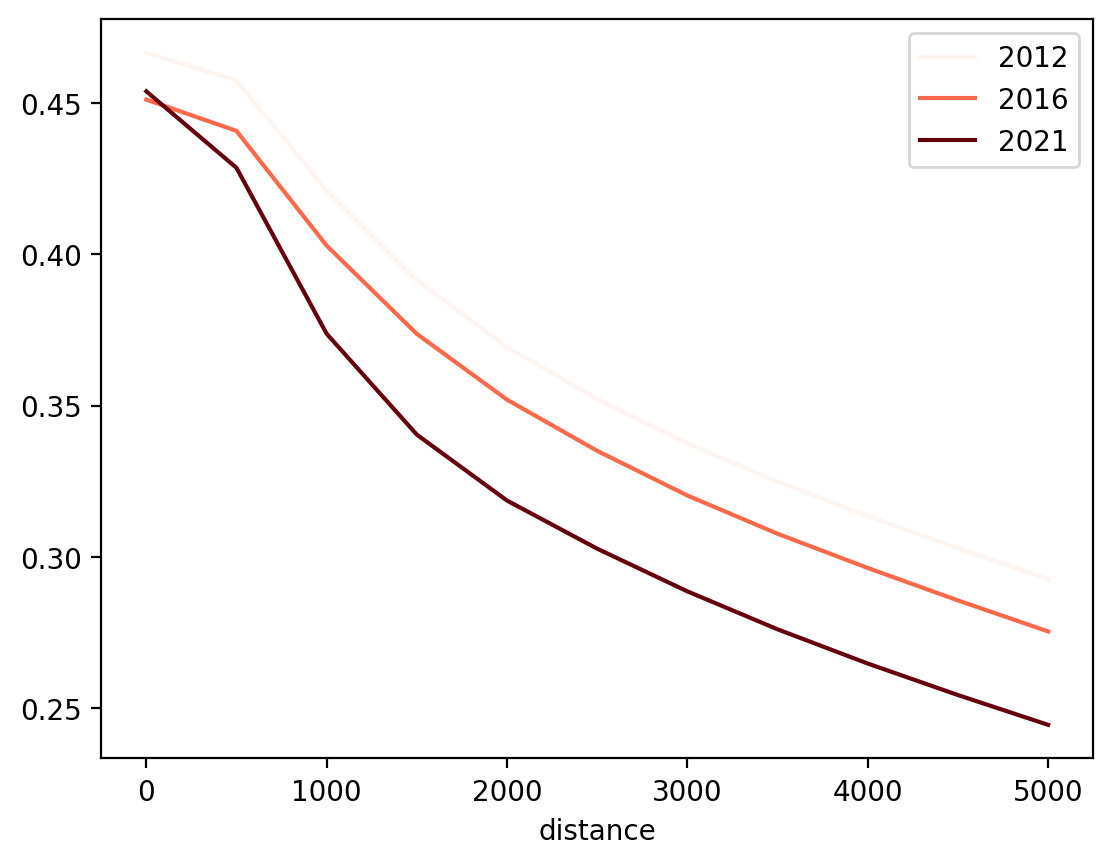

In [28]:
d.plot(cmap='Reds')

Entropy is falling the fastest at large scales (the gap is wider on the right-hand side of the graph than the left-hand side)

In [29]:
iso = segdyn.spacetime_dyn(dc, singlegroup.Isolation, group_pop_var='n_nonhisp_black_persons', total_pop_var='blackwhite', distances=list(range(500,5500,500)))

<Axes: xlabel='distance'>

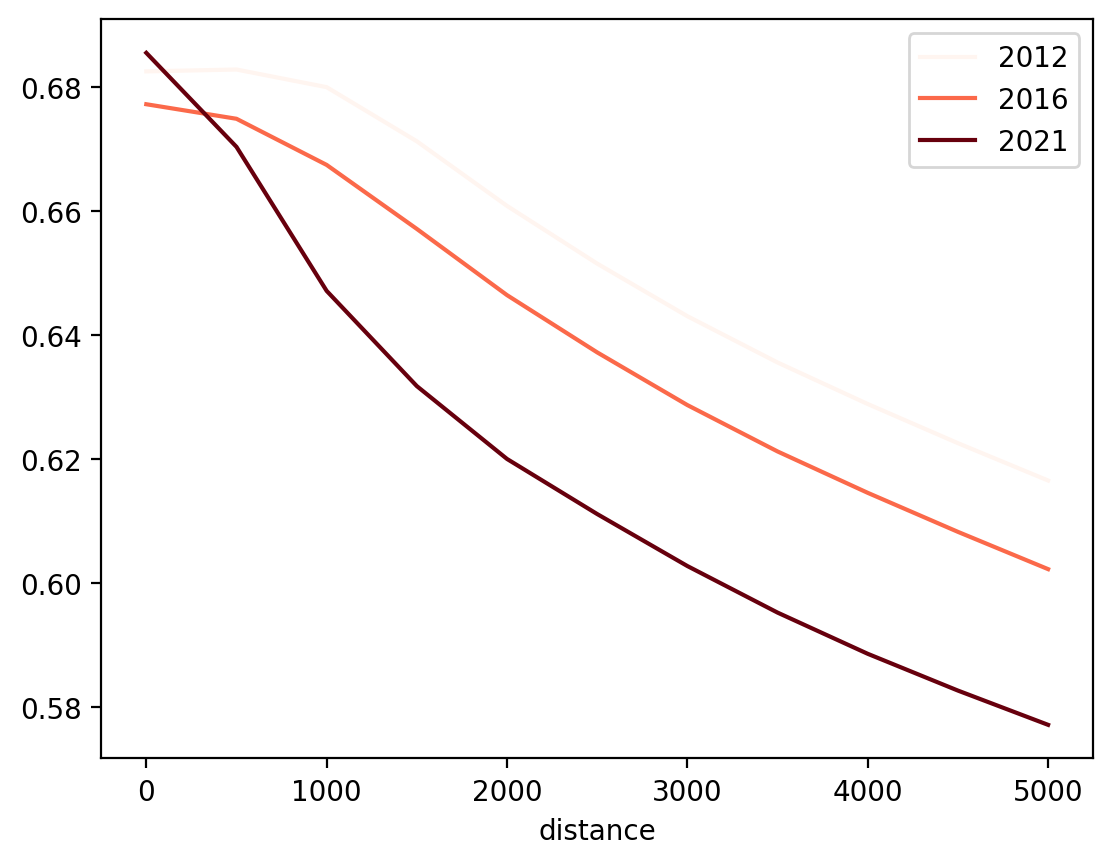

In [30]:
iso.plot(cmap='Reds')

Isolation is growing the fastest at large scales (the gap is wider with larger distances on the right). Isolation is actually growing at the smallest scale

In [31]:
from geosnap.visualize import animate_timeseries

In [32]:
animate_timeseries(dc, 'p_nonhisp_black_persons', filename='images/dc_black_pop_change.gif', fps=1.5)

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 2000x2000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

![Black Population Change in DC](images/dc_black_pop_change.gif){width=80%}

## Using geosnap as a Dashboard Engine

The Python dashboarding ecosystem is evolving quickly, so we won't opine on which platform or toolset is best. But if you have a personal favorite, `geosnap` is performant to power an urban analytics dashboard on-the-fly. The example below wraps a simple streamlit interface around the workflow above that lets us explore *every* metro region quickly

**example**:  <https://github.com/knaaptime/incseg_app>

![](https://github.com/knaaptime/incseg_app/raw/main/data/incseg_app_demo.png)